In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math
import calendar

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats
from datetime import datetime
from IPython.display import Image
from prettytable import PrettyTable

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *
import matplotlib.pyplot as plotter


warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
dataset=read_csv("deliveries.csv")

<br><h1 align=center><font color=deeppink>Distribution of Extras conceded from IPL 2008 - 2018</font></h1><br>

In [3]:
extras=dataset['extra_runs'].sum()

wide=dataset['wide_runs'].sum()
noball=dataset['noball_runs'].sum()
legbye=dataset['legbye_runs'].sum()
bye=dataset['bye_runs'].sum()
penalty=dataset['penalty_runs'].sum()

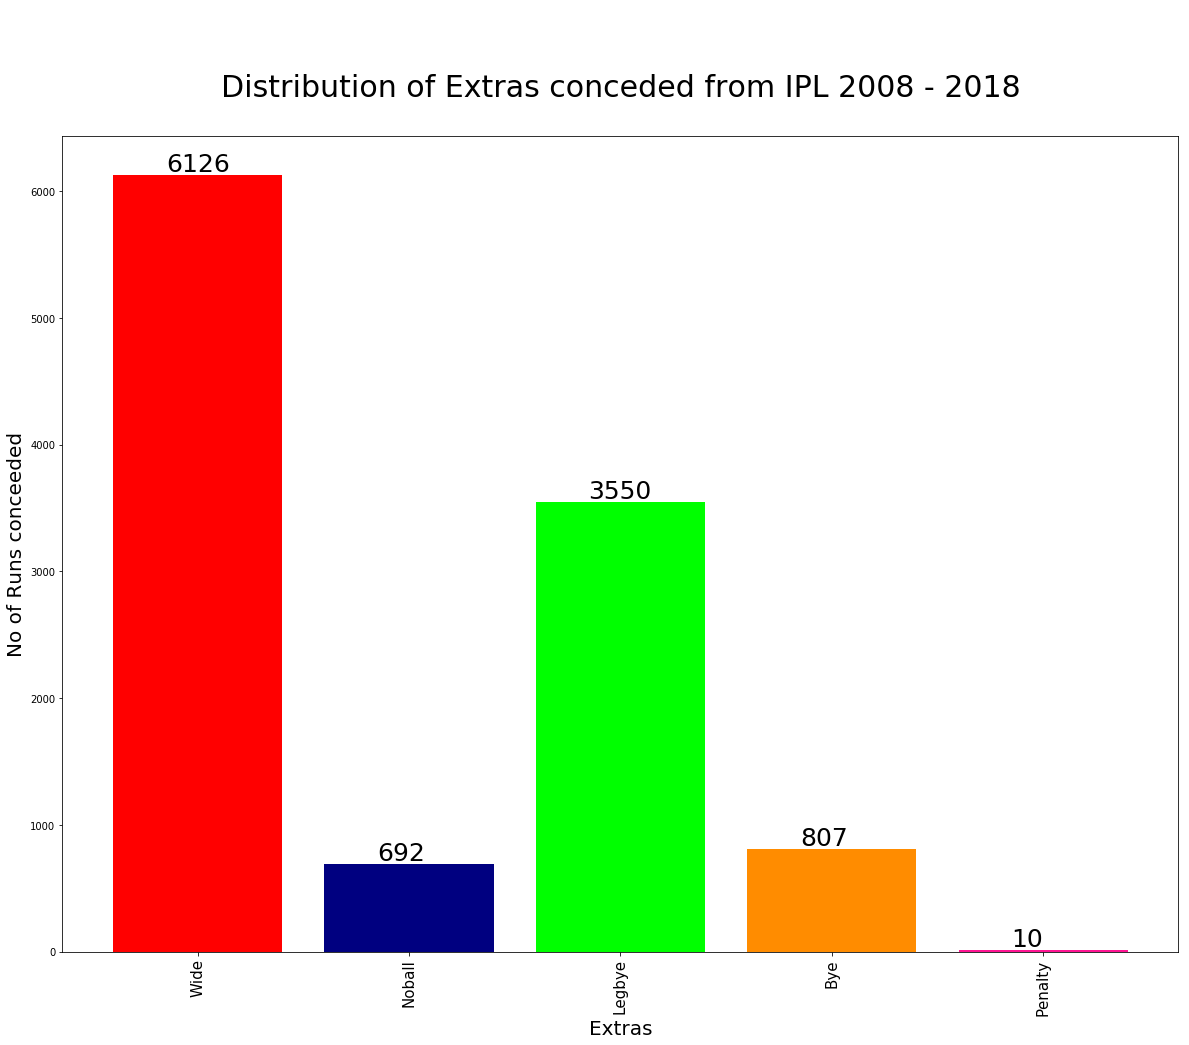

In [4]:
extras_names=['Wide', 'Noball', 'Legbye', 'Bye', 'Penalty']
no_of_extras=[wide, noball, legbye, bye, penalty]

plt.figure(figsize=(20,15))
index = np.arange(len(extras_names))
bars=plt.bar(index, no_of_extras, color=['red', 'navy', 'lime', 'darkorange', 'deeppink'])
plt.xlabel('Extras', fontsize=20)
plt.ylabel('No of Runs conceeded', fontsize=20)
plt.xticks(index, extras_names, fontsize=15, rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval +30, yval, fontsize=25)
    
plt.title('\n\nDistribution of Extras conceded from IPL 2008 - 2018\n', fontsize=30)
plt.show()

<br><br><h1 align=center><font color=deeppink>Interactive Team wise Extras Analysis from IPL 2008 - 2018</font></h1><br>

In [5]:
grouped=dataset.groupby('bowling_team')

In [6]:
input_name=input("\nEnter a team name: ")


Enter a team name: Deccan Chargers


In [7]:
for name,group in grouped:
    if(name==input_name):
        team_wide=group['wide_runs'].sum()
        team_noball=group['noball_runs'].sum()
        team_legbye=group['legbye_runs'].sum()
        team_bye=group['bye_runs'].sum()
        team_penalty=group['penalty_runs'].sum()

#print(team_penalty)
team_extra_list=[]
team_extra_list.append(team_wide)
team_extra_list.append(team_noball)
team_extra_list.append(team_legbye)
team_extra_list.append(team_bye)
team_extra_list.append(team_penalty)

<br><h2 align=center><font color=blue>Extras conceded by a team from IPL 2008 - 2018</font></h2><br>

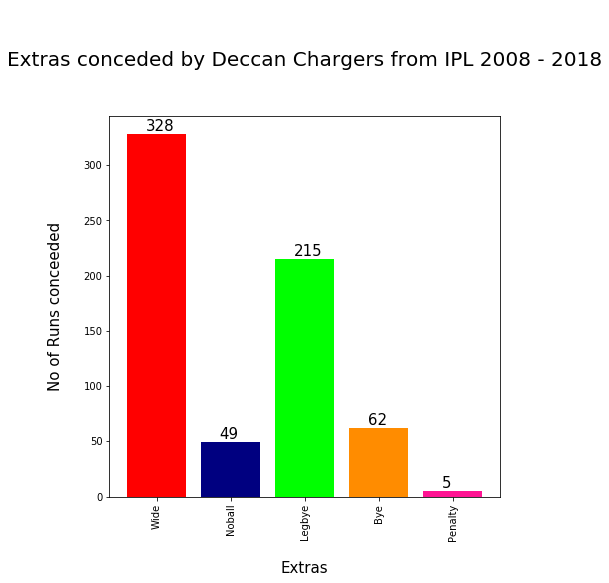

In [8]:
plt.figure(figsize=(7,7))
index = np.arange(len(extras_names))
bars=plt.bar(index, team_extra_list, color=['red', 'navy', 'lime', 'darkorange', 'deeppink'])
plt.xlabel('Extras', fontsize=15, labelpad=20)
plt.ylabel('No of Runs conceeded', fontsize=15, labelpad=20)
plt.xticks(index, extras_names, fontsize=10, rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval +3, yval, fontsize=15)
s="\n\nExtras conceded by "+input_name+" from IPL 2008 - 2018\n\n"
plt.title(s, fontsize=20)
plt.show()

<br><h2 align=center><font color=blue>Perccentage distribution of extras conceded by a team from IPL 2008 - 2018</font></h2><br>

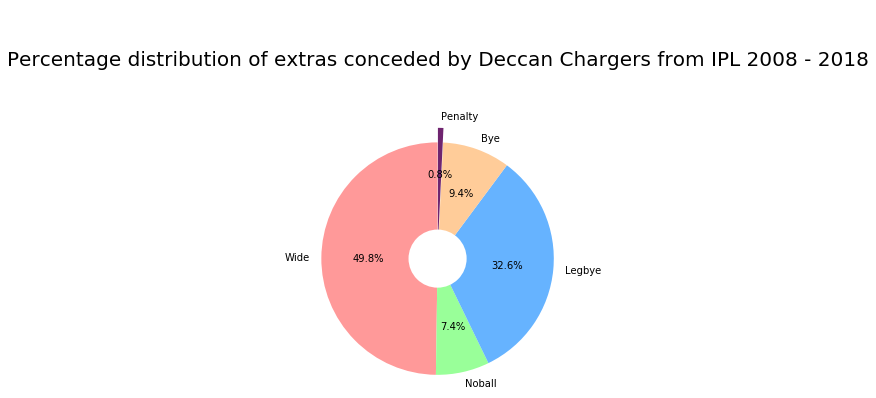

In [9]:
colors = ['#ff9999','#99ff99','#66b3ff','#ffcc99', '#6f246f']
s="\n\nPercentage distribution of extras conceded by " + input_name+" from IPL 2008 - 2018\n\n"

fig1, ax1 = plt.subplots(figsize=(6, 5))
explodeval=[0,0,0,0,25]

ax1.pie(team_extra_list, colors = colors, autopct='%1.1f%%',labels=extras_names, startangle=90, explode=explodeval, radius=200) 
    
centre_circle = plt.Circle((0,0),50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
ax1.axis('equal')
plt.title(s, fontsize=20)
plt.tight_layout()
plt.show()

<br><br><h1 align=center><font color=deeppink>Interactive Bowler wise Extras Analysis from IPL 2008 - 2018</font></h1><br>


<h3><font color=blue>The Bowling extras consist of Wides and No-Balls bowled by a bowler. Legbyes, Byes and Penalty runs are considered as Fielding extras which are not added to bowlers' stats</font></h3><br>

In [10]:
grouped=dataset.groupby('bowler')

In [11]:
input_name=input("\nEnter a bowler name: ")

for name,group in grouped:
    if(name==input_name):
        player_wide=group['wide_runs'].sum()
        player_noball=group['noball_runs'].sum()

print("\n\n"+input_name+" has bowled "+str(player_wide + player_noball)+" extras consisting of "+str(player_wide)+" wides and "+str(player_noball)+" Noballs\n")


Enter a bowler name: RA Jadeja


RA Jadeja has bowled 57 extras consisting of 55 wides and 2 Noballs



<br><br><h1 align=center><font color=deeppink>Top 5 bowlers to have conceded the most extras from IPL 2008 - 2018</font></h1><br>

In [12]:
top_bowlers=[]
bowler_extras=[]
maxi=-1
pname=""
for name, group in grouped:
    pw=group['wide_runs'].sum()
    pn=group['noball_runs'].sum()
    #print(name)
    if(pn+pw>maxi):
        maxi=(pn+pw)
        pname=name
        top_bowlers.append(pname)
        bowler_extras.append(maxi)

x=PrettyTable()
x.field_names=['Bowler Name', 'Number of extras bowled']
j=7
for i in range(0,5):
    x.add_row([top_bowlers[j],bowler_extras[j]])
    j-=1
print(x)

+-------------+-------------------------+
| Bowler Name | Number of extras bowled |
+-------------+-------------------------+
|  SL Malinga |           161           |
|   P Kumar   |           145           |
|   DJ Bravo  |           114           |
|   B Kumar   |           104           |
|   AB Dinda  |            86           |
+-------------+-------------------------+
